# Loan Prediction

## Problem 

A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans. 

We’re giving you anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

0 = Low credit risk i.e high chance of paying back the loan amount

1 = High credit risk i.e low chance of paying back the loan amount

In [1]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [2]:
# Reading the applicant dataset in a dataframe using Pandas
data = pd.read_csv("applicant.csv")

# Reading the test loan in a dataframe using Pandas
loan = pd.read_csv("loan.csv")


In [3]:
data.head(10)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
5,1213971,35,male,single,2,for free,4,unskilled - resident,1 year,4 years,Registered under the applicant's name,1,NaN,NaN,NaN
6,1428822,53,male,single,1,own,4,skilled employee / official,7 years,NaN,NaN,1,High,NaN,NaN
7,1705739,35,male,single,1,rent,2,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,0,2 lac
8,1715169,61,male,divorced/separated,1,own,4,unskilled - resident,4 years,7 years,NaN,1,Very high,NaN,NaN
9,1722991,28,male,married/widowed,1,own,2,management / self-employed / highly qualified ...,NaN,0 year,NaN,1,Low,0,2 lac


In [4]:
loan.head(10)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
5,d68d9b1e-edad-11ea-8b43-2b6a0308d487,1213971,36,education,9055000,2,NaN,0,0,NaN,1,existing loans paid back duly till now,0
6,d68d9bb4-edad-11ea-bb16-0490ef14f12e,1428822,24,FF&E,2835000,3,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
7,d68d9c40-edad-11ea-b46c-5067ccf3672a,1705739,36,used vehicle,6948000,2,car or other,0,0,NaN,1,existing loans paid back duly till now,0
8,d68d9cc2-edad-11ea-95a3-19eea692401f,1715169,12,electronic equipment,3059000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,0
9,d68d9d4e-edad-11ea-99f2-2c0022cf7ade,1722991,30,new vehicle,5234000,4,car or other,0,0,NaN,2,critical/pending loans at other banks,1


In [5]:
df = pd.merge(data,loan,on='applicant_id',how='inner')# merging the both dataset on applicant id`/

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68fbba6-edad-11ea-80fe-30b2f9300e3d,12,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0,d68fbc28-edad-11ea-bc62-4240ac0824fa,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,NaN,d68fbcaa-edad-11ea-aafc-2de1139e42cd,12,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0,d68fbd2c-edad-11ea-b49e-2894666f2df6,45,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1


In [8]:
# Summary of numerical variables for data set

df.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# for  categorical variables
df.describe(include ='O')

,Gender,Marital_status,Housing,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Purpose,Property,Other_EMI_plans,Loan_history
count,1000,1000,1000,1000,938,747,404,817,332,543,1000,988,846,186,1000
unique,2,4,3,4,4,4,1,4,2,2,1000,9,3,2,5
top,male,single,own,skilled employee / official,1 year,4 years,Registered under the applicant's name,Low,0,0,d68de9d4-edad-11ea-944a-0fbc09e75266,electronic equipment,car or other,bank,existing loans paid back duly till now
freq,690,548,713,630,339,339,404,603,269,274,1,280,332,139,530


In [10]:
df.shape

(1000, 27)

In [11]:
df.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
loan_application_id                     

In [12]:
df.drop(columns=['Other_EMI_plans','Telephone','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)','Has_been_employed_for_at_most'],axis=1,inplace=True)
#drop this column as they have more than 50% data as null value

In [13]:
df.isnull().sum()

applicant_id                                     0
Primary_applicant_age_in_years                   0
Gender                                           0
Marital_status                                   0
Number_of_dependents                             0
Housing                                          0
Years_at_current_residence                       0
Employment_status                                0
Has_been_employed_for_at_least                  62
Foreign_worker                                   0
Savings_account_balance                        183
loan_application_id                              0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_thi

# Filling null values

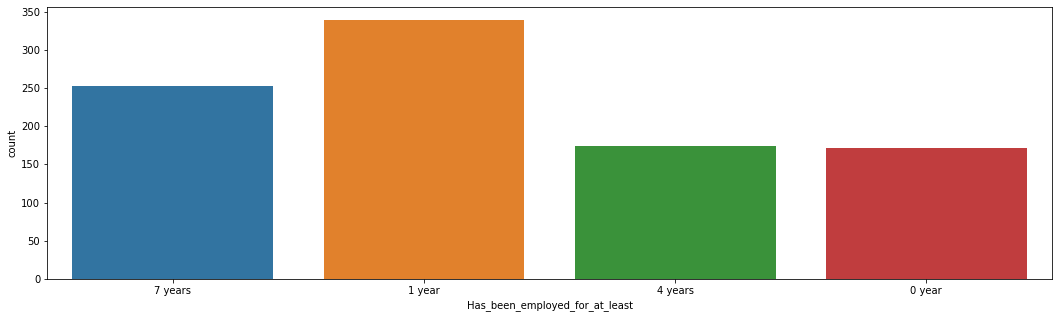

In [14]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='Has_been_employed_for_at_least',data=df)

In [15]:
df['Has_been_employed_for_at_least'].fillna('1 year',inplace=True)
# fill with mode value

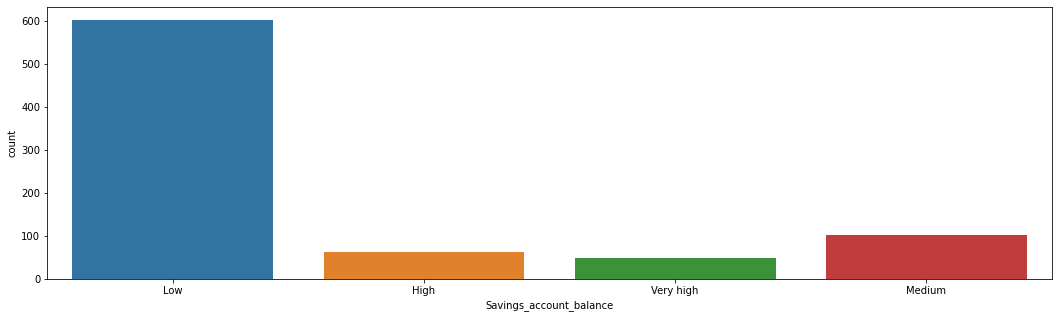

In [16]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='Savings_account_balance',data=df)

In [17]:
df['Savings_account_balance'].fillna(method='bfill',inplace = True) 
#as most of account have low balance,using forward fill to not making data bias

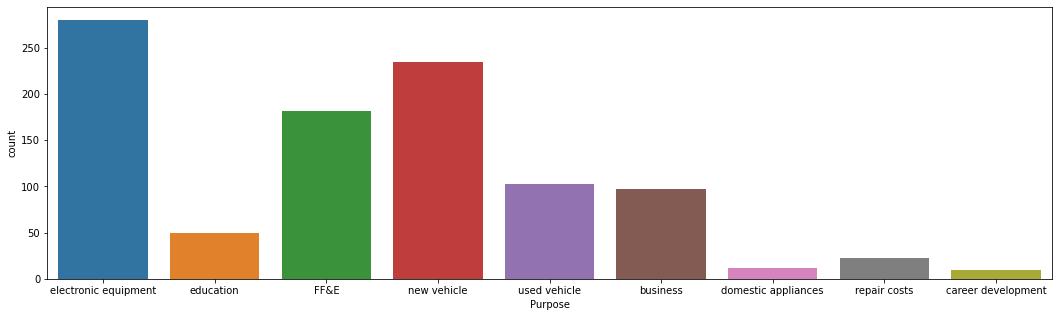

In [18]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='Purpose',data=df)

In [19]:
df['Purpose'].fillna('electronic equipment', inplace = True)

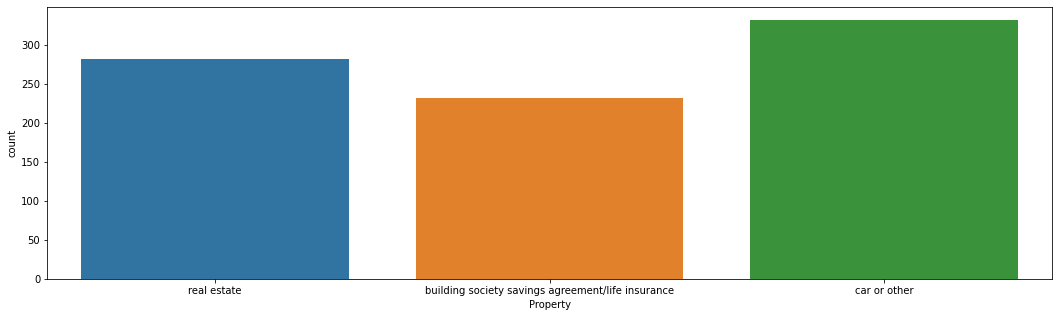

In [20]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='Property',data=df)

In [21]:
df['Property'].fillna('car or other',inplace = True)

In [22]:
df.isnull().sum()

applicant_id                                   0
Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Has_been_employed_for_at_least                 0
Foreign_worker                                 0
Savings_account_balance                        0
loan_application_id                            0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history        

# Understanding the various features (columns) of the dataset.

In [23]:
def make_plot(feature_name):# creating function for eda
    plt.figure(figsize=(18,10))
    ax= sns.countplot(x=feature_name,hue='high_risk_applicant',data=df,palette='Set2')
    plt.xlabel('customer count')
    plt.title('{} vs high_risk_applicant'.format(feature_name))
    plt.legend

In [24]:
df.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Foreign_worker',
       'Savings_account_balance', 'loan_application_id',
       'Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

<AxesSubplot:>

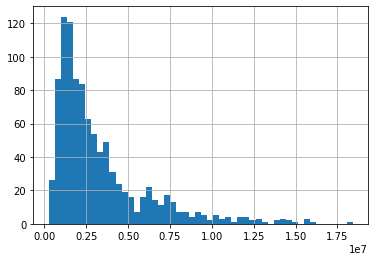

In [25]:
# Histogram of variable LoanAmount

df['Principal_loan_amount'].hist(bins=50)

<AxesSubplot:>

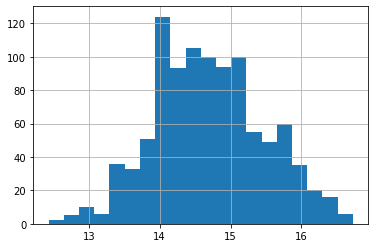

In [26]:
# Perform log transformation of TotalIncome to make it closer to normal
df['Principal_loan_amount_log'] = np.log(df['Principal_loan_amount'])

# Looking at the distribtion of TotalIncome_log
df['Principal_loan_amount_log'].hist(bins=20)

<AxesSubplot:>

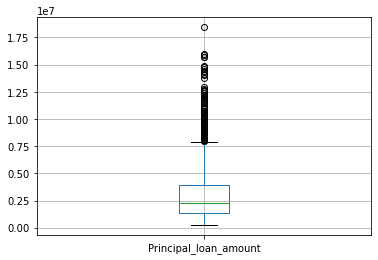

In [27]:
# Box Plot for variable LoanAmount of data set

df.boxplot(column='Principal_loan_amount')

<AxesSubplot:title={'center':'Principal_loan_amount'}, xlabel='Gender'>

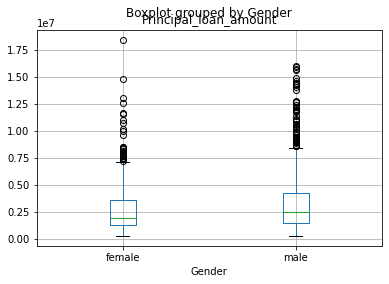

In [28]:
# Box Plot for variable LoanAmount by variable Gender of data set

df.boxplot(column='Principal_loan_amount', by = 'Gender')

In [29]:
# LoanAmount has extreme values.

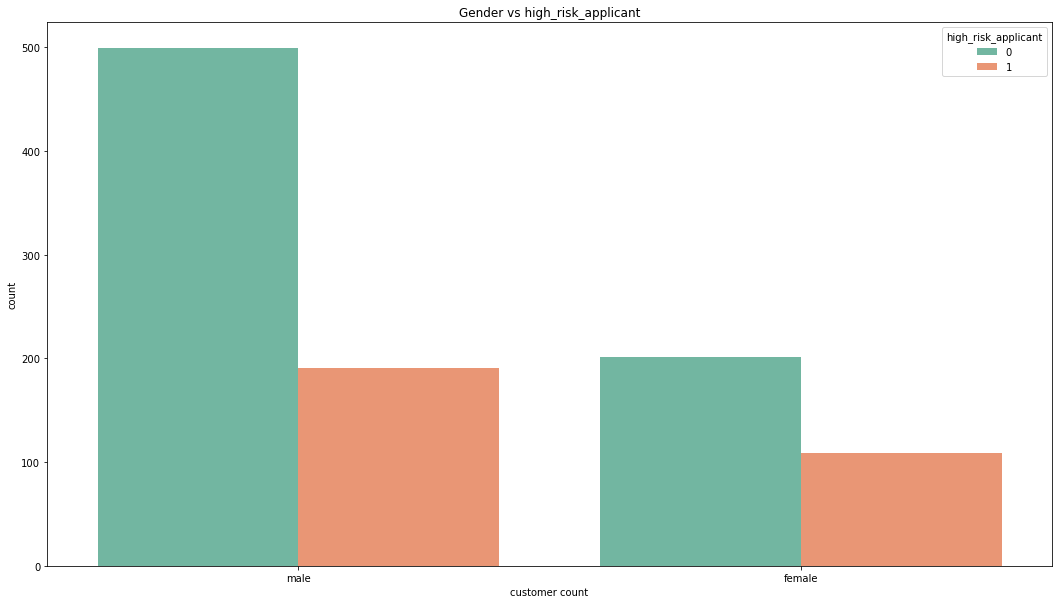

In [30]:
make_plot('Gender')

In [31]:
# on comparing ratio of high risk of males and females, females are higher in ratio which are in high risk

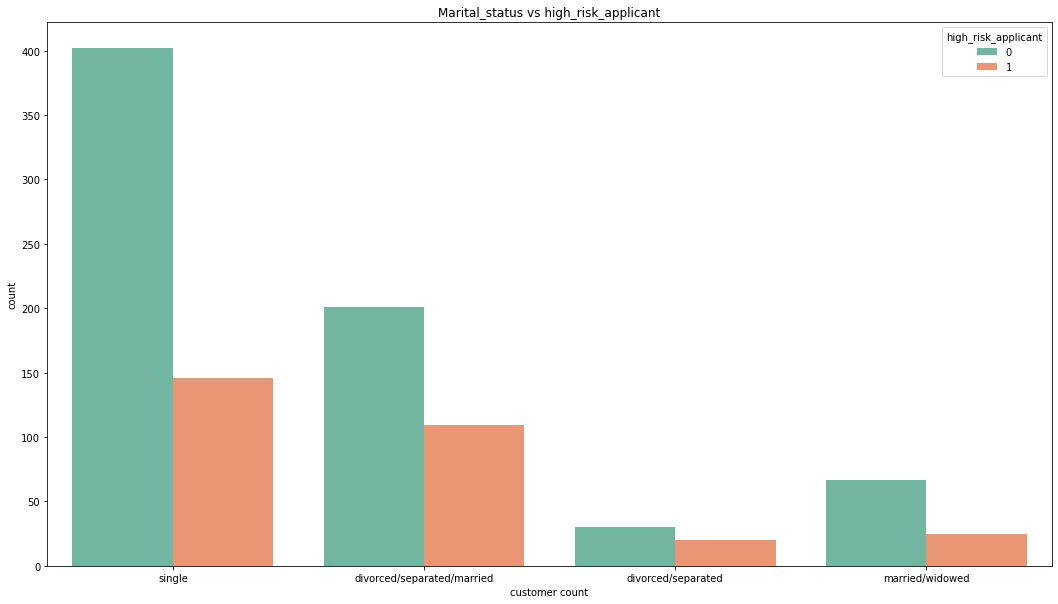

In [32]:
make_plot("Marital_status")

In [33]:
# divorced/seprated are fall in high risk with higher rate

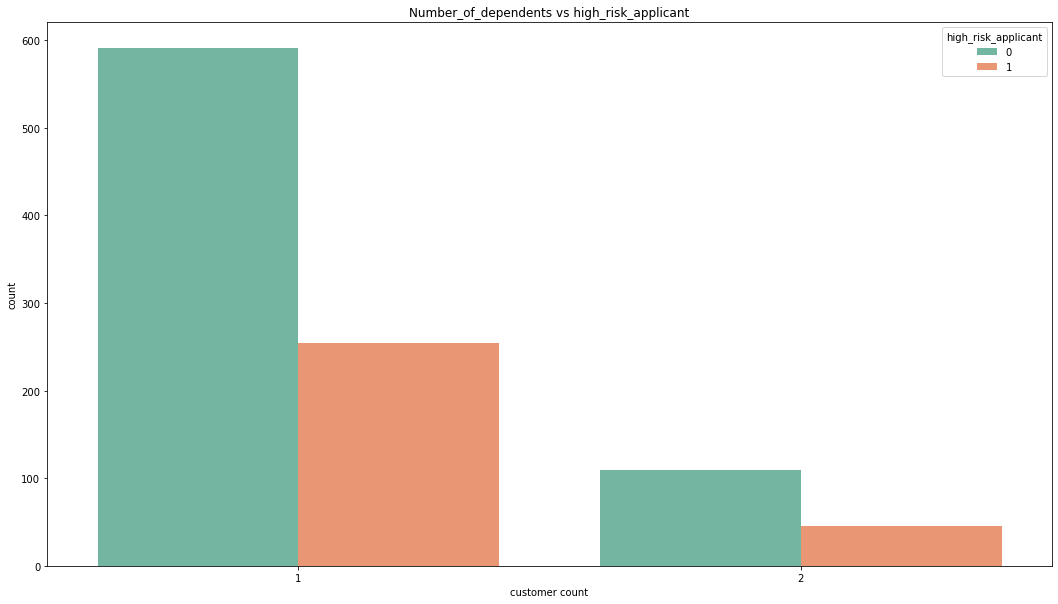

In [34]:
make_plot('Number_of_dependents')

In [35]:
#more no of dependent have higher high risk 

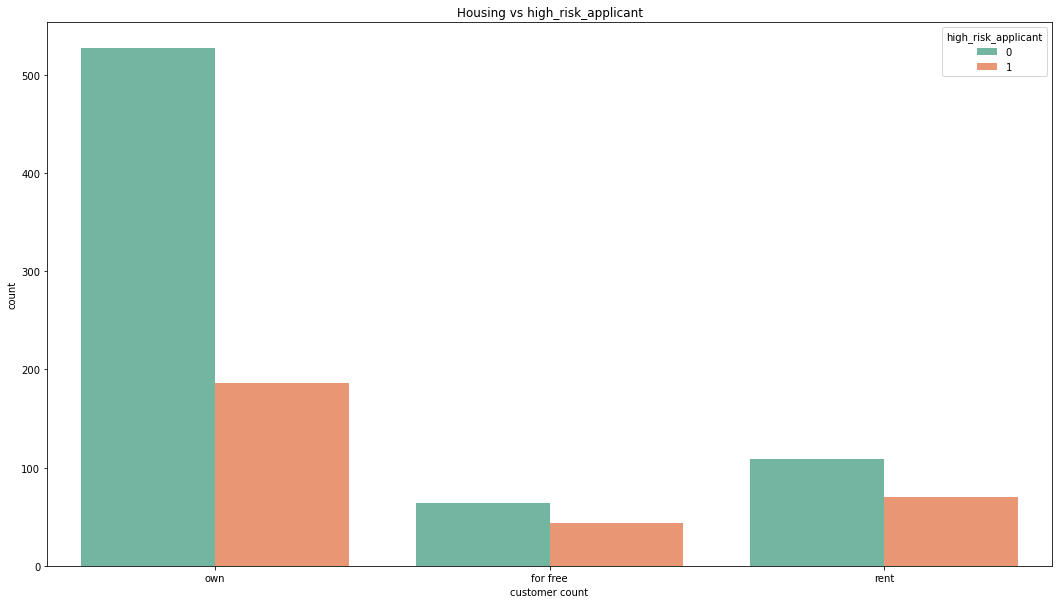

In [36]:
make_plot('Housing')

In [37]:
#who live for free or rent have higher high risk

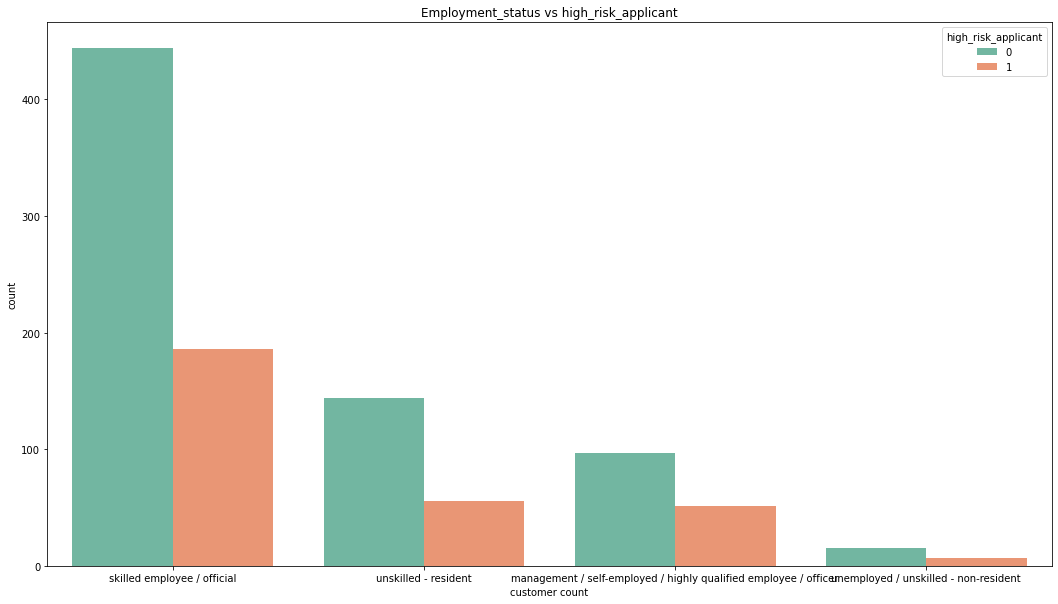

In [38]:
make_plot('Employment_status')

In [39]:
#unemployee/unskilled - non-resident have high risk

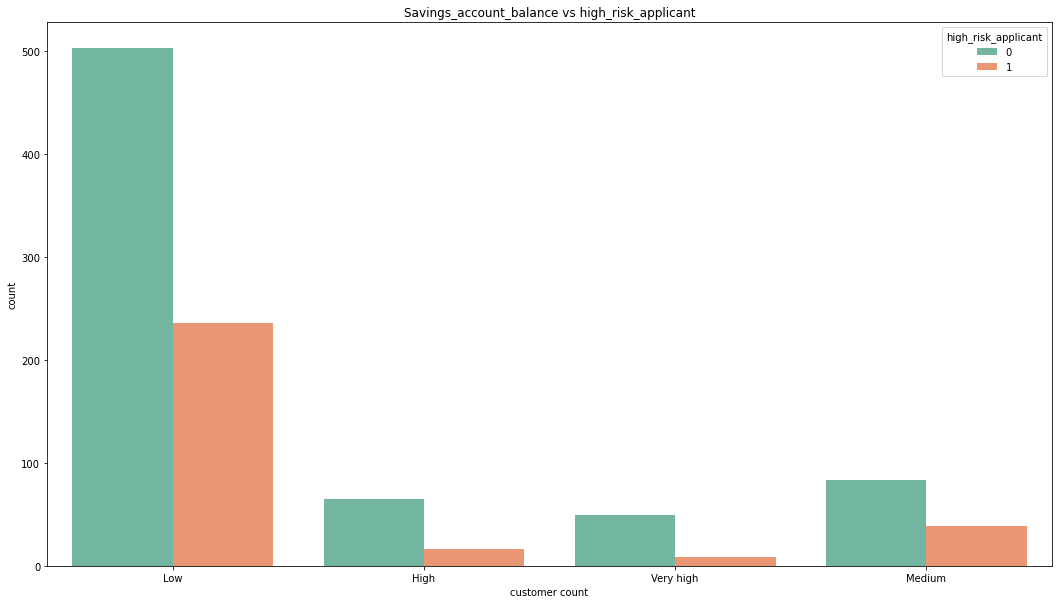

In [40]:
make_plot('Savings_account_balance')

In [41]:
#medium and low salary customer have high risk 

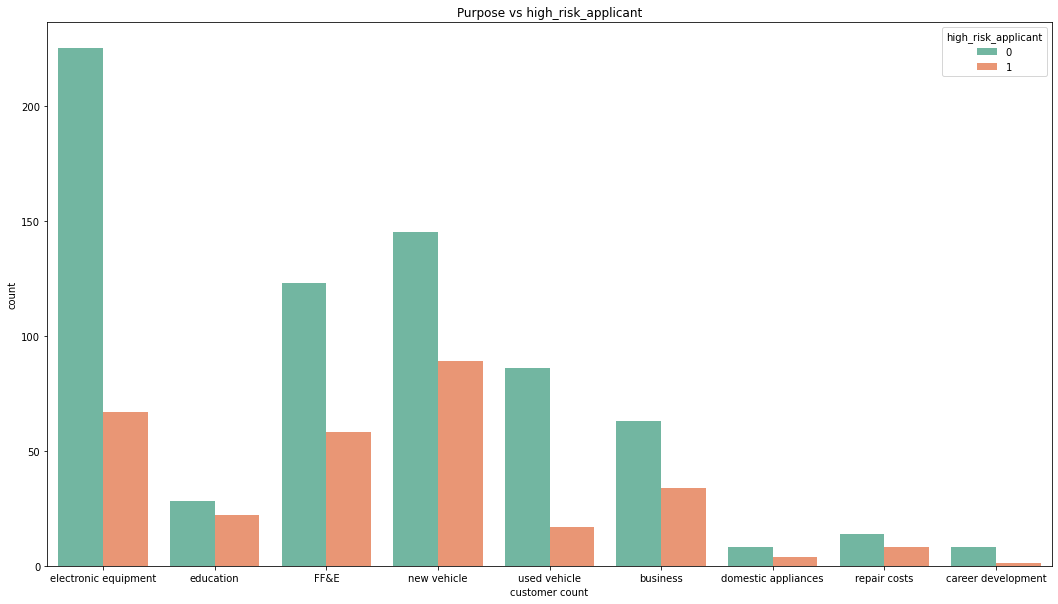

In [42]:
make_plot('Purpose')

In [43]:
#customer who take loan for new vehicle,education or repair costs having high risk

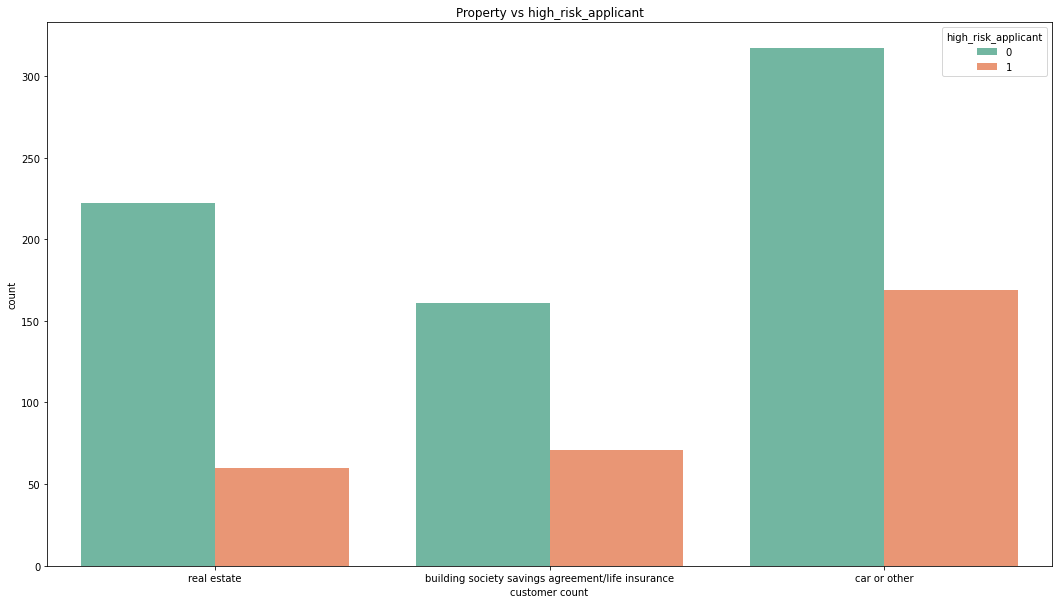

In [44]:
make_plot('Property')

In [45]:
# car and other having high risk

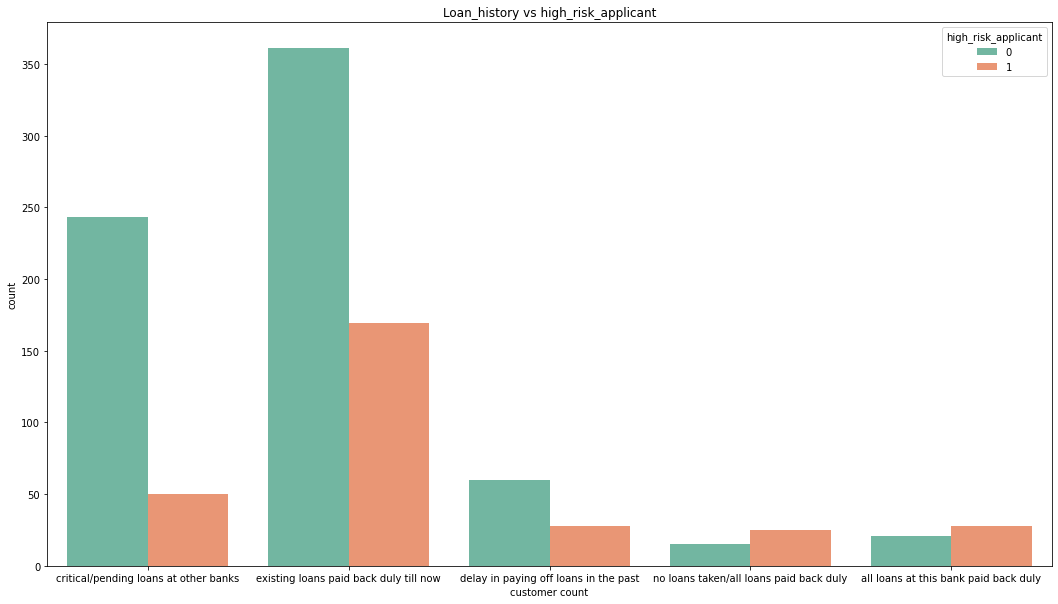

In [46]:
make_plot('Loan_history')

In [47]:
#no loan taken/all loans paid back duly and all loans at this bank paid back duly have high risk